In [10]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

In [5]:
plt.rcParams["animation.html"] = "jshtml"  # allow animation for jupyter
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

- time_bnds: (time=1980,bnds=2) with bnds giving start and end time  (year,month,day) but will be always monthly
- lai: (time=1980,lat:36,lon:72) giving lai index for each time slice at each location

In [16]:
# load data
dx_lai = xr.open_dataset('data/leaf_area_index/historical/GFDL-ESM4/lai_Lmon_GFDL-ESM4_historical_r1i1p1f1_185001-201412.nc')
dx_npp = xr.open_dataset('data/net_primary_production_on_land/historical/CMCC-CM2-SR5/npp_Lmon_CMCC-CM2-SR5_historical_r1i1p1f1_185001-201412.nc')
dx_prec = xr.open_dataset('data/precipitation_flux/historical/GFDL-ESM4/gfdl-esm4_r1i1p1f1_w5e5_historical_pr_global_daily_1851_1860.nc')
dx_temp = xr.open_dataset('data/near_surface_air_temperature/historical/GFDL-ESM4/gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1851_1860.nc')

In [ ]:
# different center used different calendars
dx_lai_ipsl = xr.open_dataset('data/leaf_area_index/historical/IPSL-CM6A-LR/lai_Lmon_IPSL-CM6A-LR_historical_r1i1p1f1_185001-201412.nc')
dx_lai_ipsl.time  

Plot a single time slice

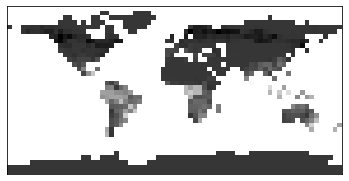

In [13]:
# single image plot
timeindex = 0
plt.imshow(dx_npp.npp[timeindex], cmap='gray', origin='lower')
plt.savefig('figs/illustration/npp_single_slice.png', bbox_inches='tight')
# print('LAI index from {} to {}'.format(dx_lai.time_bnds[timeindex,0], dx_lai.time_bnds[timeindex,1]))

Plot animation

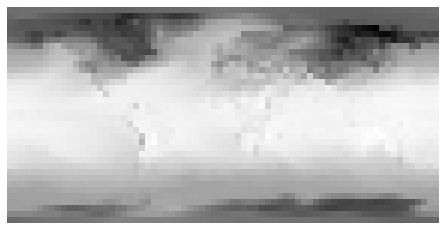

In [27]:
frames = []  # append each image
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

for timeindex in range(12):  # animate for 1 yr
    frames.append([plt.imshow(dx_temp.tas[timeindex], cmap='gray', origin='lower', animated=True)])

ani = matplotlib.animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat=True)
ani.save('figs/illustration/temp_multiple_slices.gif', writer='imagemagick', fps=60)
ani


Maybe we should rather predict each month with separate models

In [ ]:
plt.rcParams["animation.html"] = "jshtml"  # allow animation for jupyter
frames = []  # append each image
fig = plt.figure()
for timeindex in range(100):  # animate for 100 yrs january
    frames.append([plt.imshow(dx_npp.npp[timeindex*12], cmap='gray', origin='lower', animated=True)])
ani_npp_monthly = matplotlib.animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani_npp_monthly